In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Activation

# tf.__version__
tf.config.list_physical_devices()

c:\Users\rahar\.conda\envs\mlenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.5.0'

In [4]:
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
model = keras.Sequential([
    layers.Input(shape=(23,)),

    # layers.Dense(4096, activation="relu"),
    # layers.Dense(4096, activation="relu"),
    # layers.Dense(4096, activation="relu"),

    # layers.Dense(4096, activation="relu"),
    # layers.Dense(1024, activation="relu"),
    # layers.Dense(4096, activation="relu"),
    # layers.Dense(1024, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(1024, activation="relu"),
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(4096, activation="relu"),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    
    layers.Dropout(0.1),
    layers.Dense(1)
    
])
# for i in range(8):
#     model.add(Dense(2048))
#     model.add(Activation("relu"))

# model.add(Dropout(0.1))
# model.add(Dense(1))

model.build()

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3072      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              4198400   
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              1

In [7]:
model.compile(loss="mean_squared_error",
              optimizer="adam")

In [8]:
df = pd.read_csv("cleanest_dataset2.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18.220,2.693,0.00,7.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18.220,2.693,0.00,11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,18.220,2.693,0.00,2.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18.220,2.693,0.00,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18.220,2.693,0.00,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-4.547,1.819,8.42,2.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-4.547,1.819,8.42,2.0
1734,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-4.547,1.819,8.42,2.0
1735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-4.547,1.819,8.42,2.0


In [9]:
arr = pd.read_csv("cleanest_dataset2.csv",index_col= False).to_numpy()

print(arr.shape)

X_data = arr[:, :-1]
y_data = arr[:, -1]
print(X_data)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

(1737, 24)
[[ 1.     0.     0.    ... 18.22   2.693  0.   ]
 [ 1.     0.     0.    ... 18.22   2.693  0.   ]
 [ 0.     0.     0.    ... 18.22   2.693  0.   ]
 ...
 [ 0.     0.     0.    ... -4.547  1.819  8.42 ]
 [ 0.     0.     0.    ... -4.547  1.819  8.42 ]
 [ 0.     0.     0.    ... -4.547  1.819  8.42 ]]


In [10]:
X_train[1]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 7.504, 2.764, 0.   ])

In [11]:
model.fit(X_train, y_train,
          batch_size = 20, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
70/70 [==============================] - 4s 21ms/step - loss: 20.2195 - val_loss: 16.9770
Epoch 2/50
70/70 [==============================] - 1s 19ms/step - loss: 17.3023 - val_loss: 19.9723
Epoch 3/50
70/70 [==============================] - 1s 20ms/step - loss: 16.2217 - val_loss: 15.1740
Epoch 4/50
70/70 [==============================] - 1s 21ms/step - loss: 16.7252 - val_loss: 13.9148
Epoch 5/50
70/70 [==============================] - 1s 20ms/step - loss: 16.4689 - val_loss: 14.2932
Epoch 6/50
70/70 [==============================] - 2s 23ms/step - loss: 14.5627 - val_loss: 14.9398
Epoch 7/50
70/70 [==============================] - 2s 22ms/step - loss: 14.8451 - val_loss: 14.5263
Epoch 8/50
70/70 [==============================] - 1s 21ms/step - loss: 15.0638 - val_loss: 13.7189
Epoch 9/50
70/70 [==============================] - 2s 22ms/step - loss: 14.9439 - val_loss: 14.4781
Epoch 10/50
70/70 [==============================] - 1s 21ms/step - loss: 15.1340 - val_los

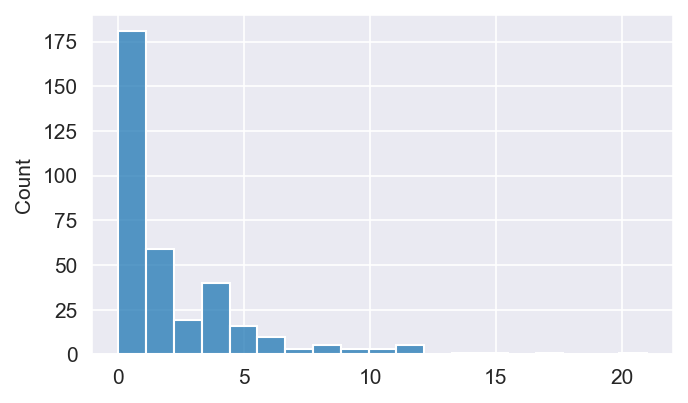

In [12]:
# model.predict(X_test)
# X_test
x = range(len(y_test))
# ys = [(i,j) for i,j in zip(model.predict(X_test),y_test)]
# ys.sort(key=lambda k:k[0])
# plt.plot(x,[i[0] for i in ys])
# plt.plot(x,[i[1] for i in ys])



# for i,j in zip(model.predict(X_test),y_test):
#     # print(f"{i} : {j}, {abs(i-j)}")
#     if abs(i-j) > 5:
#         print(f"predict is {i}, real is {j}")

stats = [abs(i-j)[0].round() for i,j in zip(model.predict(X_test),y_test)]
# stats = [abs(i-j) for i,j in zip(model.predict(X_test),y_test)]
# print(stats)

    # print(i)!pip install --upgrade tensorflow_gpu
plt.figure(figsize=(5,3),dpi=150)
sns.histplot(stats)
plt.show()

In [13]:
len(stats)

348

In [14]:
d = {}
for i in stats:
    if i not in d.keys():
        d[i] = 1
    else:
        d[i] += 1

In [15]:
import numpy as np
np.std(stats)

2.8912258

In [16]:
np.mean(stats)

2.3304598

In [17]:
d

{4.0: 40,
 12.0: 5,
 0.0: 91,
 1.0: 90,
 8.0: 5,
 5.0: 16,
 2.0: 59,
 6.0: 10,
 3.0: 19,
 10.0: 2,
 14.0: 1,
 7.0: 3,
 9.0: 3,
 21.0: 1,
 15.0: 1,
 11.0: 1,
 17.0: 1}

In [18]:
model.save("best_model")

INFO:tensorflow:Assets written to: best_model\assets
